In [37]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns           

# CSV bruto
caminho_arquivo_raw = '../data/raw/nba_player_gamelogs_raw.csv'

# Converte o CSV para DataFrame do pandas
df_raw = pd.read_csv(caminho_arquivo_raw)

# Mostra as primeiras linhas e informações gerais
print("Dados brutos carregados:")
display(df_raw.head())
df_raw.info()

Dados brutos carregados:


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22022,1630173,22201221,"Apr 09, 2023",TOR vs. MIL,W,28,6,11,0.545,...,12,13,1,2,0,2,2,14,9,1
1,22022,1630173,22201206,"Apr 07, 2023",TOR @ BOS,L,24,6,10,0.600,...,5,7,0,1,0,0,3,16,-9,1
2,22022,1630173,22201192,"Apr 05, 2023",TOR @ BOS,L,20,7,11,0.636,...,5,9,0,0,1,1,2,16,-4,1
3,22022,1630173,22201176,"Apr 04, 2023",TOR @ CHA,W,15,4,8,0.500,...,3,4,1,1,0,0,1,12,9,1
4,22022,1630173,22201163,"Apr 02, 2023",TOR @ CHA,W,13,4,7,0.571,...,2,3,0,0,0,1,0,8,6,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEASON_ID        58871 non-null  int64  
 1   Player_ID        58871 non-null  int64  
 2   Game_ID          58871 non-null  int64  
 3   GAME_DATE        58871 non-null  object 
 4   MATCHUP          58871 non-null  object 
 5   WL               58871 non-null  object 
 6   MIN              58871 non-null  int64  
 7   FGM              58871 non-null  int64  
 8   FGA              58871 non-null  int64  
 9   FG_PCT           58871 non-null  float64
 10  FG3M             58871 non-null  int64  
 11  FG3A             58871 non-null  int64  
 12  FG3_PCT          58871 non-null  float64
 13  FTM              58871 non-null  int64  
 14  FTA              58871 non-null  int64  
 15  FT_PCT           58871 non-null  float64
 16  OREB             58871 non-null  int64  
 17  DREB        

poderiamos converter a variavel "GAME_DATE" de object para datetime primeiramente

In [38]:
# Converter GAME_DATE para datetime
df_raw['GAME_DATE'] = pd.to_datetime(df_raw['GAME_DATE'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SEASON_ID        58871 non-null  int64         
 1   Player_ID        58871 non-null  int64         
 2   Game_ID          58871 non-null  int64         
 3   GAME_DATE        58871 non-null  datetime64[ns]
 4   MATCHUP          58871 non-null  object        
 5   WL               58871 non-null  object        
 6   MIN              58871 non-null  int64         
 7   FGM              58871 non-null  int64         
 8   FGA              58871 non-null  int64         
 9   FG_PCT           58871 non-null  float64       
 10  FG3M             58871 non-null  int64         
 11  FG3A             58871 non-null  int64         
 12  FG3_PCT          58871 non-null  float64       
 13  FTM              58871 non-null  int64         
 14  FTA              58871 non-null  int64

Verificando agora se há valores ausentes

In [39]:
# Conta quantos valores nulos existem em cada coluna
print("\nValores ausentes por coluna:")
print(df_raw.isnull().sum())


Valores ausentes por coluna:
SEASON_ID          0
Player_ID          0
Game_ID            0
GAME_DATE          0
MATCHUP            0
WL                 0
MIN                0
FGM                0
FGA                0
FG_PCT             0
FG3M               0
FG3A               0
FG3_PCT            0
FTM                0
FTA                0
FT_PCT             0
OREB               0
DREB               0
REB                0
AST                0
STL                0
BLK                0
TOV                0
PF                 0
PTS                0
PLUS_MINUS         0
VIDEO_AVAILABLE    0
dtype: int64


# Entendimento das Colunas (Dicionário de Dados)

Antes de selecionar e transformar as colunas, vamos entender o que cada uma representa no dataset bruto (`df_raw`):

* **`SEASON_ID`**: Identificador da temporada (ex: 22022 para 2022-23). *(Tipo: int64)*
* **`Player_ID`**: Identificador único para cada jogador. *(Tipo: int64)*
* **`Game_ID`**: Identificador único para cada jogo. *(Tipo: int64)*
* **`GAME_DATE`**: Data em que o jogo ocorreu. *(Tipo: datetime64[ns])* - Já convertida.
* **`MATCHUP`**: Descrição do confronto (ex: 'LAL @ DEN' - Lakers fora vs Nuggets; 'LAL vs. PHX' - Lakers em casa vs Suns). *(Tipo: object)*
* **`WL`**: Resultado do jogo para o time do jogador (W = Vitória, L = Derrota). *(Tipo: object)*
* **`MIN`**: Minutos jogados na partida. *(Tipo: int64)*
* **`FGM`**: Field Goals Made (Cestas de 2 ou 3 pontos convertidas). *(Tipo: int64)*
* **`FGA`**: Field Goals Attempted (Tentativas de cestas de 2 ou 3 pontos). *(Tipo: int64)*
* **`FG_PCT`**: Field Goal Percentage (Percentual de acerto de arremessos de 2/3 pontos). *(Tipo: float64)*
* **`FG3M`**: 3-Point Field Goals Made (Cestas de 3 pontos convertidas). *(Tipo: int64)*
* **`FG3A`**: 3-Point Field Goals Attempted (Tentativas de cestas de 3 pontos). *(Tipo: int64)*
* **`FG3_PCT`**: 3-Point Field Goal Percentage (Percentual de acerto de arremessos de 3 pontos). *(Tipo: float64)*
* **`FTM`**: Free Throws Made (Lances livres convertidos). *(Tipo: int64)*
* **`FTA`**: Free Throws Attempted (Tentativas de lances livres). *(Tipo: int64)*
* **`FT_PCT`**: Free Throw Percentage (Percentual de acerto de lances livres). *(Tipo: float64)*
* **`OREB`**: Offensive Rebounds (Rebotes pegos no ataque). *(Tipo: int64)*
* **`DREB`**: Defensive Rebounds (Rebotes pegos na defesa). *(Tipo: int64)*
* **`REB`**: Total Rebounds (Soma de OREB + DREB). *(Tipo: int64)*
* **`AST`**: Assists (Assistências). *(Tipo: int64)*
* **`STL`**: Steals (Roubos de bola). *(Tipo: int64)*
* **`BLK`**: Blocks (Tocos). *(Tipo: int64)*
* **`TOV`**: Turnovers (Erros/Perdas de bola). *(Tipo: int64)*
* **`PF`**: Personal Fouls (Faltas pessoais cometidas). *(Tipo: int64)*
* **`PTS`**: Points (Pontos marcados). *(Tipo: int64)*
* **`PLUS_MINUS`**: +/- (Saldo de pontos do time enquanto o jogador esteve em quadra). *(Tipo: int64)*
* **`VIDEO_AVAILABLE`**: Flag indicando se há vídeo disponível para o jogo (geralmente 1 ou 0). *(Tipo: int64)*

## Seleção das colunas relevantes

In [40]:
colunas_relevantes = [
    'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL', # Identificação e Contexto
    'MIN', # Minutos jogados (MUITO importante)
    'PTS', 'AST', 'REB', 'FG3M', # variáveis ALVO principais
    # podem ser features úteis: FGM, FGA, FTM, FTA, OREB, DREB, TOV, PF, PLUS_MINUS
    'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF', 'PLUS_MINUS' 
]

# Cria um novo DataFrame apenas com as colunas selecionadas
df_limpo = df_raw[colunas_relevantes].copy() # .copy() evita avisos do Pandas

print("\nDataFrame com colunas relevantes:")
display(df_limpo.head())
df_limpo.info()


DataFrame com colunas relevantes:


,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,AST,REB,FG3M,FGM,FGA,FTM,FTA,OREB,DREB,TOV,PF,PLUS_MINUS
0,1630173,22201221,2023-04-09,TOR vs. MIL,W,28,14,1,13,2,6,11,0,0,1,12,2,2,9
1,1630173,22201206,2023-04-07,TOR @ BOS,L,24,16,0,7,1,6,10,3,3,2,5,0,3,-9
2,1630173,22201192,2023-04-05,TOR @ BOS,L,20,16,0,9,1,7,11,1,1,4,5,1,2,-4
3,1630173,22201176,2023-04-04,TOR @ CHA,W,15,12,1,4,2,4,8,2,2,1,3,0,1,9
4,1630173,22201163,2023-04-02,TOR @ CHA,W,13,8,0,3,0,4,7,0,0,1,2,1,0,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player_ID   58871 non-null  int64         
 1   Game_ID     58871 non-null  int64         
 2   GAME_DATE   58871 non-null  datetime64[ns]
 3   MATCHUP     58871 non-null  object        
 4   WL          58871 non-null  object        
 5   MIN         58871 non-null  int64         
 6   PTS         58871 non-null  int64         
 7   AST         58871 non-null  int64         
 8   REB         58871 non-null  int64         
 9   FG3M        58871 non-null  int64         
 10  FGM         58871 non-null  int64         
 11  FGA         58871 non-null  int64         
 12  FTM         58871 non-null  int64         
 13  FTA         58871 non-null  int64         
 14  OREB        58871 non-null  int64         
 15  DREB        58871 non-null  int64         
 16  TOV         58871 non-

## Engenharia de features inicial

Basicamente quero criar informações novas e mais úteis para o modelo. 
Por exemplo, a coluna matchup vai trazer informações bem relevantes como o time do jogador, o adversário e se o jogo foi dentro ou fora de casa pra o jogador especificado.
Da pra extrair isso

In [41]:
# Exemplo: Extrair o time adversário
def extrair_adversario(matchup):
    if '@' in matchup: # Jogo fora
        return matchup.split('@')[1].strip()
    elif 'vs.' in matchup: # Jogo em casa
        return matchup.split('vs.')[1].strip()
    return None # Caso não encontre o padrão

df_limpo['OPPONENT'] = df_limpo['MATCHUP'].apply(extrair_adversario)

# Exemplo: Criar flag 'HOME' (1 para casa, 0 para fora)
df_limpo['HOME'] = df_limpo['MATCHUP'].apply(lambda x: 1 if 'vs.' in x else 0)

print("\nDataFrame com informações do adversário e local:")
display(df_limpo[['GAME_DATE', 'Player_ID', 'MATCHUP', 'OPPONENT', 'HOME']].head())


DataFrame com informações do adversário e local:


,GAME_DATE,Player_ID,MATCHUP,OPPONENT,HOME
0,2023-04-09,1630173,TOR vs. MIL,MIL,1
1,2023-04-07,1630173,TOR @ BOS,BOS,0
2,2023-04-05,1630173,TOR @ BOS,BOS,0
3,2023-04-04,1630173,TOR @ CHA,CHA,0
4,2023-04-02,1630173,TOR @ CHA,CHA,0


Além disso, os jogos não estão em ordem cronológica para cada jogador, o que dá pra organizar dessa forma:


In [42]:
# Ordena primeiro pelo jogador, depois pela data do jogo
df_limpo = df_limpo.sort_values(by=['Player_ID', 'GAME_DATE'], ascending=[True, True])
print("\nDataFrame ordenado por jogador e data:")
display(df_limpo.head())


DataFrame ordenado por jogador e data:


,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,AST,REB,FG3M,...,FGA,FTM,FTA,OREB,DREB,TOV,PF,PLUS_MINUS,OPPONENT,HOME
9281,2544,22200002,2022-10-18,LAL @ GSW,L,35,31,8,15,3,...,26,4,4,5,10,5,2,-10,GSW,0
9280,2544,22200016,2022-10-20,LAL vs. LAC,L,37,20,6,10,2,...,17,4,6,2,8,2,3,-1,LAC,1
9279,2544,22200037,2022-10-23,LAL vs. POR,L,38,31,8,8,2,...,22,5,7,1,7,4,3,2,POR,1
9278,2544,22200064,2022-10-26,LAL @ DEN,L,35,19,9,7,2,...,21,1,2,2,5,8,1,-7,DEN,0
9277,2544,22200076,2022-10-28,LAL @ MIN,L,37,28,5,7,1,...,24,7,8,3,4,3,2,-13,MIN,0


Criando "pistas" para o modelo

Vamos calcular a média movel recente do jogador (a forma dele)

Podemos até dizer que essa seria uma das features mais importantes do modelo para prever o desempenho esportivo. Queremos saber como jogador estava jogando antes da partida que queremos prever.

Para cada jogo na nossa tabela, vamos calcular a média das estatísticas (PTS, AST, REB, etc.) dos X jogos anteriores daquele mesmo jogador.

In [43]:
stats_cols = ['MIN', 'PTS', 'AST', 'REB', 'FG3M', 'FGM', 'FGA', 'FTM', 'FTA', 'OREB', 'DREB', 'TOV', 'PF']

# Janelas de tempo para as médias (ex: últimos 5 e 10 jogos)
rolling_windows = [5, 10]

print("Calculando médias móveis...")

# Agrupa o DataFrame por jogador
grouped = df_limpo.groupby('Player_ID')

# Para cada janela (5, 10)
for window in rolling_windows:
    # Para cada estatística lista
    for col in stats_cols:
        # Calcula a média móvel dos 'window' jogos anteriores
        # shift(1) garante que está usando apenas jogos PASSADOS (evita data leakage)
        # rolling(window) define a janela
        # min_periods=1 permite calcular a média mesmo se houver menos jogos que a janela (ex: início da temporada)
        df_limpo[f'{col}_MA_{window}'] = grouped[col].shift(1).rolling(window, min_periods=1).mean()

print("Médias móveis calculadas!")

# Verifica as novas colunas criadas para um jogador específico (ex: LeBron)
display(df_limpo[df_limpo['Player_ID'] == 2544].head(15)) # Mostra as 15 primeiras linhas do LeBron

Calculando médias móveis...
Médias móveis calculadas!


,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,AST,REB,FG3M,...,REB_MA_10,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10
9281,2544,22200002,2022-10-18,LAL @ GSW,L,35,31,8,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9280,2544,22200016,2022-10-20,LAL vs. LAC,L,37,20,6,10,2,...,15.000000,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000
9279,2544,22200037,2022-10-23,LAL vs. POR,L,38,31,8,8,2,...,12.500000,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000
9278,2544,22200064,2022-10-26,LAL @ DEN,L,35,19,9,7,2,...,11.000000,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667
9277,2544,22200076,2022-10-28,LAL @ MIN,L,37,28,5,7,1,...,10.000000,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000
9276,2544,22200095,2022-10-30,LAL vs. DEN,W,35,26,8,6,2,...,9.400000,2.000000,9.800000,22.000000,4.200000,5.400000,2.600000,6.800000,4.400000,2.200000
9275,2544,22200117,2022-11-02,LAL vs. NOP,W,40,20,8,10,0,...,8.833333,2.000000,9.833333,22.000000,4.166667,5.333333,2.166667,6.666667,4.166667,2.000000
9274,2544,22200131,2022-11-04,LAL vs. UTA,L,34,17,8,10,0,...,9.000000,1.714286,9.714286,22.142857,3.857143,5.142857,1.857143,7.142857,3.857143,2.142857
9273,2544,22200140,2022-11-06,LAL vs. CLE,L,34,27,4,7,1,...,9.125000,1.500000,9.375000,21.750000,3.750000,5.125000,1.875000,7.250000,3.750000,2.250000
9272,2544,22200170,2022-11-09,LAL @ LAC,L,32,30,5,8,4,...,8.888889,1.444444,9.777778,21.888889,3.333333,4.888889,1.888889,7.000000,3.444444,2.000000


as novas colunas PTS_MA_5, AST_MA_1). Nos primeiros jogos da temporada, elas terão valores NaN ou a média de poucos jogos, pois não há histórico suficiente. Conforme os jogos passam, a média se estabiliza usando a janela completa. Esses NaNs precisarão ser tratados depois (ex: preenchendo com 0 ou com a média geral da temporada anterior).

## Análise exploratória detalhada (EDA)

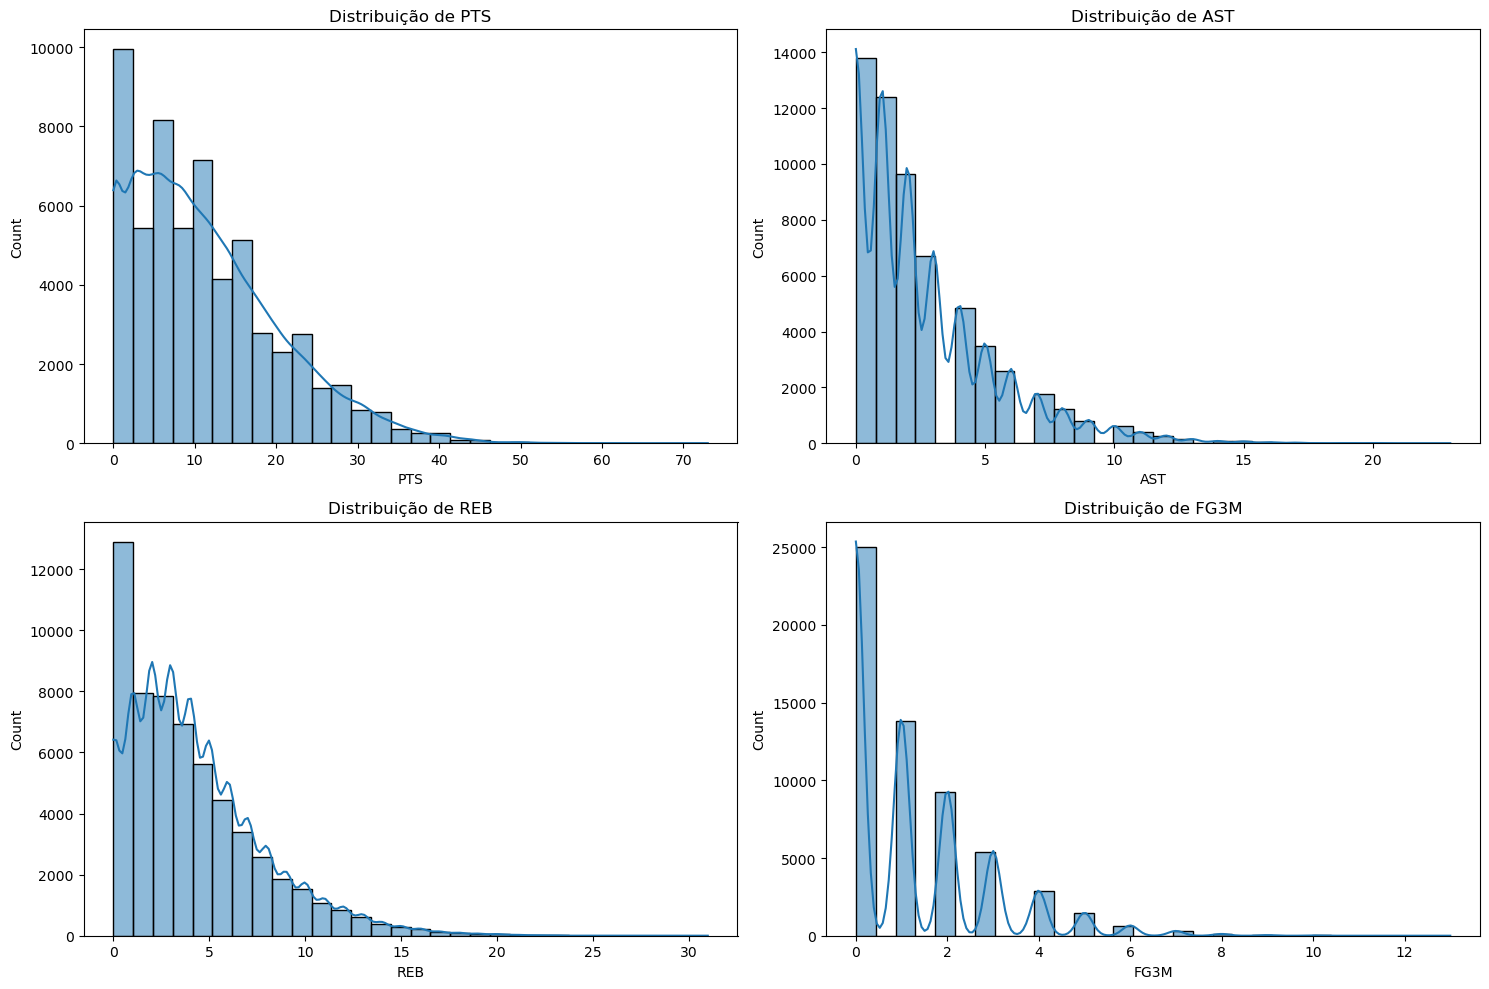

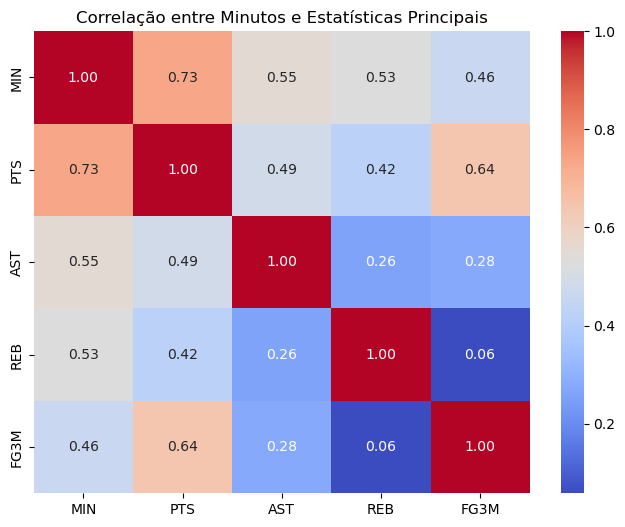

In [44]:
# Distribuição das principais estatísticas alvo
stats_principais = ['PTS', 'AST', 'REB', 'FG3M']
plt.figure(figsize=(15, 10))
for i, col in enumerate(stats_principais):
    plt.subplot(2, 2, i + 1) # Cria um grid 2x2 para os gráficos
    # CORREÇÃO: Usar df_limpo ao invés de df_gamelogs
    sns.histplot(df_limpo[col], kde=True, bins=30) 
    plt.title(f'Distribuição de {col}')
plt.tight_layout() # Ajusta espaçamento
plt.show()

# Correlação entre minutos jogados e estatísticas alvo
cols_correlacao = ['MIN'] + stats_principais

correlacoes = df_limpo[cols_correlacao].corr() 
plt.figure(figsize=(8, 6))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Minutos e Estatísticas Principais')
plt.show()

## Integrando Estatísticas Defensivas do Adversário

Esses dados foram coletados tambem pela API da NBA_API onde pegamos os dados de estatisticas defensivas do adversário e criamos um CSV novo. para executar basta dar um make defense_data.

Agora que temos as estatísticas jogo a jogo dos jogadores (`df_limpo`) e as estatísticas defensivas médias de cada time por temporada (`nba_team_defense_stats_raw.csv`), precisamos juntar essas informações.

Para cada jogo no `df_limpo`, queremos adicionar colunas que descrevam a performance defensiva do time `OPPONENT` naquela `Season` específica. Isso nos dará features cruciais sobre a "dificuldade" do confronto para o jogador.

Realizaremos os seguintes passos:
1. Carregar o dataset de estatísticas defensivas (`df_defense`).
2. Realizar uma pequena limpeza/renomeação no `df_defense` para garantir a compatibilidade (nomes de times, formato da temporada).
3. Extrair a temporada (`Season`) a partir da coluna `GAME_DATE` no `df_limpo`.
4. Realizar um `merge` (junção) entre `df_limpo` e `df_defense` usando as colunas `Season` e `OPPONENT`/`Team` como chaves.

## Analisando o df_defense antes

In [45]:
if 'df_defense' in locals():
    team_col_defense = 'TEAM_NAME' if 'TEAM_NAME' in df_defense.columns else 'Team'
    if team_col_defense in df_defense.columns:
         unique_teams_defense = df_defense[team_col_defense].unique()
         print(f"\nNomes únicos de times no df_defense ({len(unique_teams_defense)}):")
         print(sorted(unique_teams_defense))
    else:
        print("Coluna de nome de time não encontrada em df_defense.")

# Distribuição de algumas estatísticas defensivas (ex: PTS permitidos)
if 'df_defense' in locals() and 'PTS' in df_defense.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_defense['PTS'], kde=True, bins=20)
    plt.title('Distribuição de Pontos Permitidos por Jogo (Médias por Time/Temporada)')
    plt.xlabel('Pontos Permitidos')
    plt.show()




Nomes únicos de times no df_defense (80):
['Atlanta Dream', 'Atlanta Hawks', 'Austin Spurs', 'Birmingham Squadron', 'Boston Celtics', 'Brooklyn Nets', 'Capital City Go-Go', 'Charlotte Hornets', 'Chicago Bulls', 'Chicago Sky', 'China', 'Ciudad de Mexico Capitanes', 'Cleveland Cavaliers', 'Cleveland Charge', 'College Park Skyhawks', 'Connecticut Sun', 'Dallas Mavericks', 'Dallas Wings', 'Delaware Blue Coats', 'Denver Nuggets', 'Detroit Pistons', 'Fort Wayne Mad Ants', 'G League Ignite', 'Golden State Warriors', 'Grand Rapids Gold', 'Greensboro Swarm', 'Houston Rockets', 'Indiana Fever', 'Indiana Mad Ants', 'Indiana Pacers', 'Iowa Wolves', 'LA Clippers', 'Lakeland Magic', 'Las Vegas Aces', 'Long Island Nets', 'Los Angeles Lakers', 'Los Angeles Sparks', 'Maine Celtics', 'Memphis Grizzlies', 'Memphis Hustle', 'Miami Heat', 'Milwaukee Bucks', 'Minnesota Lynx', 'Minnesota Timberwolves', 'Motor City Cruise', 'New Orleans Pelicans', 'New York Knicks', 'New York Liberty', 'Oklahoma City Blue', 

Isso mostra que os dados dok df_defense vão causar problemas para o objetivo desse projeto, pois temos dados de diversos times que nem sequer são da NBA. Como dados da WNBA e até seleção como a da china. por isso, deve realizar uma limpeza antes.

In [46]:
import pandas as pd
import os

# --- Carregar Dados Defensivos ---
caminho_defense_raw = '../data/raw/nba_team_defense_stats_raw.csv'
df_defense = pd.read_csv(caminho_defense_raw)

print(f"Dados defensivos brutos carregados. Shape: {df_defense.shape}")

# --- ETAPA DE FILTRO E MAPEAMENTO (A CORREÇÃO) ---

# 1. Pega a lista "mestra" de 30 times da NBA do df_limpo (que já tem a coluna OPPONENT)
nba_teams_abbr = [team for team in df_limpo['OPPONENT'].unique() if team is not None]
print(f"Encontradas {len(nba_teams_abbr)} abreviações únicas da NBA no df_limpo.")

# 2. Mapeamento de Nomes Completos (df_defense) para Abreviações (df_limpo)
team_name_map = {
    'Atlanta Hawks': 'ATL', 'Boston Celtics': 'BOS', 'Brooklyn Nets': 'BKN',
    'Charlotte Hornets': 'CHA', 'Chicago Bulls': 'CHI', 'Cleveland Cavaliers': 'CLE',
    'Dallas Mavericks': 'DAL', 'Denver Nuggets': 'DEN', 'Detroit Pistons': 'DET',
    'Golden State Warriors': 'GSW', 'Houston Rockets': 'HOU', 'Indiana Pacers': 'IND',
    'LA Clippers': 'LAC', 'Los Angeles Lakers': 'LAL', 'Memphis Grizzlies': 'MEM',
    'Miami Heat': 'MIA', 'Milwaukee Bucks': 'MIL', 'Minnesota Timberwolves': 'MIN',
    'New Orleans Pelicans': 'NOP', 'New York Knicks': 'NYK', 'Oklahoma City Thunder': 'OKC',
    'Orlando Magic': 'ORL', 'Philadelphia 76ers': 'PHI', 'Phoenix Suns': 'PHX',
    'Portland Trail Blazers': 'POR', 'Sacramento Kings': 'SAC', 'San Antonio Spurs': 'SAS',
    'Toronto Raptors': 'TOR', 'Utah Jazz': 'UTA', 'Washington Wizards': 'WAS'
}

# 3. Mapeia e Filtra o df_defense
team_col_defense = 'TEAM_NAME' if 'TEAM_NAME' in df_defense.columns else 'Team'
if team_col_defense in df_defense.columns:
    # Cria a nova coluna de abreviação (ex: 'LAL')
    df_defense['TEAM_ABBR_Mapped'] = df_defense[team_col_defense].map(team_name_map)
    
    # Filtra df_defense para manter APENAS os times da NBA
    df_defense = df_defense[
        df_defense['TEAM_ABBR_Mapped'].notna() &
        df_defense['TEAM_ABBR_Mapped'].isin(nba_teams_abbr)
    ].copy()
    
    print(f"df_defense filtrado para {df_defense.shape[0]} registros (apenas NBA).")
else:
    print(f"ATENÇÃO: Coluna de nome de time '{team_col_defense}' não encontrada.")

# --- FIM DA ETAPA DE FILTRO ---


# --- Preparação para o Merge (Agora com dados limpos) ---

# 1. Limpeza inicial em df_defense: Remover colunas duplicadas se houver
df_defense = df_defense.loc[:,~df_defense.columns.duplicated()]

# 2. Renomear colunas em df_defense
cols_rename_defense = {
    # MUDANÇA IMPORTANTE: Agora usamos a coluna mapeada como chave
    'TEAM_ABBR_Mapped': 'OPPONENT', 
    'PTS': 'OPP_PTS_PER_G',
    'FG_PCT': 'OPP_FG_PCT',
    'FG3_PCT': 'OPP_FG3_PCT',
    'AST': 'OPP_AST_PER_G',
    'REB': 'OPP_REB_PER_G',
    'STL': 'OPP_STL_PER_G', # Adicionando colunas que faltavam
    'BLK': 'OPP_BLK_PER_G'  # Adicionando colunas que faltavam
}

# Filtra apenas as colunas que existem antes de tentar renomear
cols_to_rename_existing = {k: v for k, v in cols_rename_defense.items() if k in df_defense.columns}
df_defense_renamed = df_defense.rename(columns=cols_to_rename_existing)

# 3. Selecionar explicitamente as colunas finais para df_defense_final
colunas_defensivas_desejadas = list(cols_to_rename_existing.values()) 
colunas_para_manter = ['Season', 'OPPONENT'] + colunas_defensivas_desejadas
colunas_para_manter_existentes = [col for col in colunas_para_manter if col in df_defense_renamed.columns]
colunas_para_manter_unicas = list(dict.fromkeys(colunas_para_manter_existentes)) 

df_defense_final = df_defense_renamed[colunas_para_manter_unicas]


print("\nDataFrame defensivo preparado para merge (apenas NBA):")
display(df_defense_final.head())


# 4. Criar coluna 'Season' em df_limpo
def get_season_from_date(date):
    year = date.year
    month = date.month
    if month >= 10:
        return f"{year}-{str(year+1)[-2:]}"
    else:
        return f"{year-1}-{str(year)[-2:]}"

if 'Season' not in df_limpo.columns:
    df_limpo['Season'] = df_limpo['GAME_DATE'].apply(get_season_from_date)
    print("\nColuna 'Season' adicionada ao df_limpo.")

# --- Realizar o Merge ---
print("\nRealizando o merge...")
df_merged = pd.merge(
    df_limpo,
    df_defense_final,
    on=['Season', 'OPPONENT'], # Agora o merge vai funcionar!
    how='left'
)

print("Merge concluído!")
display(df_merged.head())
df_merged.info()

print("\nValores ausentes após merge (verificar colunas OPP_):")
# Se houver valores ausentes aqui, significa que faltou algum mapeamento de time/temporada
print(df_merged.isnull().sum())

Dados defensivos brutos carregados. Shape: (221, 55)
Encontradas 30 abreviações únicas da NBA no df_limpo.
df_defense filtrado para 90 registros (apenas NBA).

DataFrame defensivo preparado para merge (apenas NBA):


,Season,OPPONENT
1,2022-23,ATL
4,2022-23,BOS
5,2022-23,BKN
7,2022-23,CHA
8,2022-23,CHI



Coluna 'Season' adicionada ao df_limpo.

Realizando o merge...
Merge concluído!


,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,AST,REB,FG3M,...,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10,Season
0,2544,22200002,2022-10-18,LAL @ GSW,L,35,31,8,15,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-23
1,2544,22200016,2022-10-20,LAL vs. LAC,L,37,20,6,10,2,...,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,2022-23
2,2544,22200037,2022-10-23,LAL vs. POR,L,38,31,8,8,2,...,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,2022-23
3,2544,22200064,2022-10-26,LAL @ DEN,L,35,19,9,7,2,...,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,2022-23
4,2544,22200076,2022-10-28,LAL @ MIN,L,37,28,5,7,1,...,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,2022-23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 48 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Player_ID   58871 non-null  int64         
 1   Game_ID     58871 non-null  int64         
 2   GAME_DATE   58871 non-null  datetime64[ns]
 3   MATCHUP     58871 non-null  object        
 4   WL          58871 non-null  object        
 5   MIN         58871 non-null  int64         
 6   PTS         58871 non-null  int64         
 7   AST         58871 non-null  int64         
 8   REB         58871 non-null  int64         
 9   FG3M        58871 non-null  int64         
 10  FGM         58871 non-null  int64         
 11  FGA         58871 non-null  int64         
 12  FTM         58871 non-null  int64         
 13  FTA         58871 non-null  int64         
 14  OREB        58871 non-null  int64         
 15  DREB        58871 non-null  int64         
 16  TOV         58871 non-

Há 1 valor ausente em cada coluna de média móvel (_MA_5, _MA_10). Isso é normal e esperado. Acontece para o primeiro jogo de cada jogador no nosso dataset, pois não há jogos anteriores para calcular a média.

Continuando nesse processo de engenharia de features, não dá pra alimentar  modelo com valores NaN. Então precisa tratar esses valores ausentes nas médias móveis.

A estratégia mais simples e comum é preencher esses valores ausentes com 0. Isso faz sentido porque, no primeiro jogo, o jogador ainda não tem um histórico naquele dataset para calcular a média.


## Tratando valores ausentes no dataset Merged

In [47]:
# Lista de todas as colunas de média móvel
cols_medias_moveis = [col for col in df_merged.columns if '_MA_' in col]

# Preenche os valores NaN (ausentes) com 0 nessas colunas
df_merged[cols_medias_moveis] = df_merged[cols_medias_moveis].fillna(0)

# Verifica se os NaNs sumiram
print("Valores ausentes após preenchimento (verificar colunas _MA_):")
print(df_merged[cols_medias_moveis].isnull().sum())


Valores ausentes após preenchimento (verificar colunas _MA_):
MIN_MA_5      0
PTS_MA_5      0
AST_MA_5      0
REB_MA_5      0
FG3M_MA_5     0
FGM_MA_5      0
FGA_MA_5      0
FTM_MA_5      0
FTA_MA_5      0
OREB_MA_5     0
DREB_MA_5     0
TOV_MA_5      0
PF_MA_5       0
MIN_MA_10     0
PTS_MA_10     0
AST_MA_10     0
REB_MA_10     0
FG3M_MA_10    0
FGM_MA_10     0
FGA_MA_10     0
FTM_MA_10     0
FTA_MA_10     0
OREB_MA_10    0
DREB_MA_10    0
TOV_MA_10     0
PF_MA_10      0
dtype: int64


In [48]:
df_merged.head()

,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,AST,REB,FG3M,...,FG3M_MA_10,FGM_MA_10,FGA_MA_10,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10,Season
0,2544,22200002,2022-10-18,LAL @ GSW,L,35,31,8,15,3,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-23
1,2544,22200016,2022-10-20,LAL vs. LAC,L,37,20,6,10,2,...,3.000000,12.000000,26.000000,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,2022-23
2,2544,22200037,2022-10-23,LAL vs. POR,L,38,31,8,8,2,...,2.500000,9.500000,21.500000,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,2022-23
3,2544,22200064,2022-10-26,LAL @ DEN,L,35,19,9,7,2,...,2.333333,10.333333,21.666667,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,2022-23
4,2544,22200076,2022-10-28,LAL @ MIN,L,37,28,5,7,1,...,2.250000,9.750000,21.500000,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,2022-23


## Engenharia de Features Finais

Com as médias móveis e os dados defensivos integrados, vou adicionar as últimas features:


1.  **Dias de Descanso (`DAYS_REST`):** Calcular quantos dias o jogador teve de descanso desde sua última partida. Isso pode impactar o desempenho (fadiga).
2.  **Flag Back-to-Back (`IS_B2B`):** Uma variável binária (1 ou 0) indicando se o jogador jogou no dia anterior. Jogos B2B são notoriamente desgastantes.
3.  **Resultado do Jogo Anterior (`WIN_LAST_GAME`):** Converter a coluna `WL` (Win/Loss) do jogo *anterior* para um formato numérico (1 para vitória, 0 para derrota). O resultado anterior pode ter um impacto psicológico.

Após criar essas features, vai salvar o DataFrame final e processado na pasta `data/processed/` para a etapa de modelagem.

1. Dias de Descanso (DAYS_REST)    
Agrupa por jogador e calcula a diferença entre as datas dos jogos     
.diff() calcula a diferença para a linha anterior no grupo     
.dt.days extrai o número de dias     
subtrai 1 porque a diferença é entre Jogo A e Jogo B (1 dia de diferença = 0 dias de descanso)

In [49]:
import pandas as pd
import os


print("Criando features finais...")


df_merged['DAYS_REST'] = df_merged.groupby('Player_ID')['GAME_DATE'].diff().dt.days - 1

# Preenche o NaN do primeiro jogo de cada jogador (não há jogo anterior)
df_merged['DAYS_REST'] = df_merged['DAYS_REST'].fillna(7) # Preenchendo com 7 dias

print(" -> Feature DAYS_REST criada.")



Criando features finais...
 -> Feature DAYS_REST criada.


2. Flag Back-to-Back (IS_B2B)                 
 Se DAYS_REST for 0, significa que o jogo anterior foi ontem

In [50]:

df_merged['IS_B2B'] = (df_merged['DAYS_REST'] == 0).astype(int)
print(" -> Feature IS_B2B criada.")

 -> Feature IS_B2B criada.


3. Resultado do Jogo Anterior (WIN_LAST_GAME).                                                          
Primeiro, converte a coluna WL atual para 0 (Loss) ou 1 (Win)

In [51]:

df_merged['WIN'] = (df_merged['WL'] == 'W').astype(int)
# Agora, usa shift(1) dentro de cada grupo de jogador para pegar o resultado do jogo ANTERIOR
df_merged['WIN_LAST_GAME'] = df_merged.groupby('Player_ID')['WIN'].shift(1)
# Preenche o NaN do primeiro jogo (não há jogo anterior) com um valor neutro (ex: 0.5 ou 0)
df_merged['WIN_LAST_GAME'] = df_merged['WIN_LAST_GAME'].fillna(0) # Preenchendo com 0 (como se fosse derrota)
print(" -> Feature WIN_LAST_GAME criada.")

 -> Feature WIN_LAST_GAME criada.


In [52]:
#Limpeza Final e Seleção
cols_to_drop = ['MATCHUP', 'WL', 'WIN'] # MATCHUP virou OPPONENT/HOME, WL virou WIN_LAST_GAME
df_final_features = df_merged.drop(columns=cols_to_drop)

# Verifica as colunas finais e os tipos de dados
print("\nDataFrame final com todas as features:")
display(df_final_features.head())
df_final_features.info()

# --- Salvando o Dataset Processado ---
pasta_dados_processados = '../data/processed'
os.makedirs(pasta_dados_processados, exist_ok=True)
caminho_arquivo_proc = os.path.join(pasta_dados_processados, 'nba_player_gamelogs_processed.csv')

df_final_features.to_csv(caminho_arquivo_proc, index=False)
print(f"\nDados processados e com features salvos com sucesso em: {caminho_arquivo_proc}")


DataFrame final com todas as features:


,Player_ID,Game_ID,GAME_DATE,MIN,PTS,AST,REB,FG3M,FGM,FGA,...,FTM_MA_10,FTA_MA_10,OREB_MA_10,DREB_MA_10,TOV_MA_10,PF_MA_10,Season,DAYS_REST,IS_B2B,WIN_LAST_GAME
0,2544,22200002,2022-10-18,35,31,8,15,3,12,26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022-23,7.0,0,0.0
1,2544,22200016,2022-10-20,37,20,6,10,2,7,17,...,4.000000,4.000000,5.000000,10.000000,5.000000,2.000000,2022-23,1.0,0,0.0
2,2544,22200037,2022-10-23,38,31,8,8,2,12,22,...,4.000000,5.000000,3.500000,9.000000,3.500000,2.500000,2022-23,2.0,0,0.0
3,2544,22200064,2022-10-26,35,19,9,7,2,8,21,...,4.333333,5.666667,2.666667,8.333333,3.666667,2.666667,2022-23,2.0,0,0.0
4,2544,22200076,2022-10-28,37,28,5,7,1,10,24,...,3.500000,4.750000,2.500000,7.500000,4.750000,2.250000,2022-23,1.0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58871 entries, 0 to 58870
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_ID      58871 non-null  int64         
 1   Game_ID        58871 non-null  int64         
 2   GAME_DATE      58871 non-null  datetime64[ns]
 3   MIN            58871 non-null  int64         
 4   PTS            58871 non-null  int64         
 5   AST            58871 non-null  int64         
 6   REB            58871 non-null  int64         
 7   FG3M           58871 non-null  int64         
 8   FGM            58871 non-null  int64         
 9   FGA            58871 non-null  int64         
 10  FTM            58871 non-null  int64         
 11  FTA            58871 non-null  int64         
 12  OREB           58871 non-null  int64         
 13  DREB           58871 non-null  int64         
 14  TOV            58871 non-null  int64         
 15  PF             5887